<a href="https://colab.research.google.com/github/climate-and-health-datasci-Unicamp/py-climate-health-toolbox/blob/master/examples/IAC_heatwave_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:**
* [Daniela Souza de Oliveira](https://github.com/Danielaso)

*created in jul/2020*



# IAC heatwave analyses

**Input:** IAC_1890_2018.csv

*   Computing heatwaves
*   Yearly and seasonal metrics
*   Trend analyses
*   Heatwaves intensity

**Output:** HW_IAC, pct_IAC and HW_IAC_metrics

In [ ]:
#installing packages
!pip install py-climate-health-toolbox
!pip install pymannkendall
!pip install pyhomogeneity

In [ ]:
# importing libraries
import climahe.climatex
import climatex as tex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pymannkendall as mk
import pyhomogeneity as hg
import more_itertools as mit


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Loading Data: IAC_1890_2018.csv


In [ ]:
#Reading data
df_IAC = pd.read_csv('/content/drive/Shared drives/Clima&Saúde/Dados/Dados_Clima/IAC/data/processed/IAC_1890_2018.csv')

#converting 'DATE' column to datetime format
df_IAC['DATE'] = pd.to_datetime(df_IAC['DATE'])
df_IAC

,DATE,YEAR,DAY365,N_RAIN_TOT,N_AIRTMP_MAX,N_AIRTMP_MIN
0,1890-01-01,1890,1,0.3,24.4,16.6
1,1890-01-02,1890,2,9.0,28.4,15.9
2,1890-01-03,1890,3,2.0,28.9,16.5
3,1890-01-04,1890,4,47.0,30.4,18.0
4,1890-01-05,1890,5,29.0,28.8,17.3
...,...,...,...,...,...,...
47111,2018-12-27,2018,361,0.0,28.8,19.0
47112,2018-12-28,2018,362,23.1,31.2,18.6
47113,2018-12-29,2018,363,0.0,31.7,18.7
47114,2018-12-30,2018,364,0.0,32.1,19.8


In [ ]:
#checking columns data types
df_IAC.dtypes

DATE            datetime64[ns]
YEAR                     int64
DAY365                   int64
N_RAIN_TOT             float64
N_AIRTMP_MAX           float64
N_AIRTMP_MIN           float64
dtype: object

### Defining Climatogical Normal (1961-1990)

In [ ]:
#defining climatological normal
#selecting period from 1961 to 1990
climatic_normal = df_IAC[(df_IAC['YEAR']>1960)&(df_IAC['YEAR']<=1990)]
climatic_normal=climatic_normal.reset_index()
del climatic_normal['index']

climatic_normal

,DATE,YEAR,DAY365,N_RAIN_TOT,N_AIRTMP_MAX,N_AIRTMP_MIN
0,1961-01-01,1961,1,0.3,27.9,19.0
1,1961-01-02,1961,2,27.4,26.0,19.1
2,1961-01-03,1961,3,47.5,31.4,19.0
3,1961-01-04,1961,4,0.3,27.9,20.0
4,1961-01-05,1961,5,11.9,30.7,18.7
...,...,...,...,...,...,...
10952,1990-12-27,1990,361,0.0,29.8,18.4
10953,1990-12-28,1990,362,0.0,31.2,17.0
10954,1990-12-29,1990,363,3.6,24.6,18.2
10955,1990-12-30,1990,364,4.4,26.0,11.2


### Defining Database (1956-2018)



In [ ]:
#defining database
#selecting data from 1956 to 2018
databaseIAC=df_IAC[(df_IAC['YEAR']>1955)&(df_IAC['YEAR']<=2018)] 
databaseIAC=databaseIAC.reset_index()
del databaseIAC['index']

databaseIAC

,DATE,YEAR,DAY365,N_RAIN_TOT,N_AIRTMP_MAX,N_AIRTMP_MIN
0,1956-01-01,1956,1,5.5,30.3,18.8
1,1956-01-02,1956,2,6.6,31.1,19.4
2,1956-01-03,1956,3,13.8,33.1,19.9
3,1956-01-04,1956,4,0.0,31.7,20.1
4,1956-01-05,1956,5,0.7,32.7,19.1
...,...,...,...,...,...,...
23006,2018-12-27,2018,361,0.0,28.8,19.0
23007,2018-12-28,2018,362,23.1,31.2,18.6
23008,2018-12-29,2018,363,0.0,31.7,18.7
23009,2018-12-30,2018,364,0.0,32.1,19.8


In [ ]:
databaseIAC.describe()

,YEAR,DAY365,N_RAIN_TOT,N_AIRTMP_MAX,N_AIRTMP_MIN
count,23011.000000,23011.000000,23011.000000,22643.000000,23011.000000
mean,1986.999305,183.127243,3.801195,27.667313,16.184355
std,18.184835,105.442084,10.046020,3.733536,3.335466
min,1956.000000,1.000000,0.000000,10.700000,0.200000
25%,1971.000000,92.000000,0.000000,25.400000,14.000000
50%,1987.000000,183.000000,0.000000,28.000000,16.600000
75%,2003.000000,274.000000,1.300000,30.400000,18.900000
max,2018.000000,366.000000,144.700000,38.300000,25.000000


#### Checking missing data



In [ ]:
databaseIAC.shape

(23011, 6)

In [ ]:
#checking NA values
databaseIAC.isna().sum()

DATE              0
YEAR              0
DAY365            0
N_RAIN_TOT        0
N_AIRTMP_MAX    368
N_AIRTMP_MIN      0
dtype: int64

In [ ]:
#Calculating missing data - maximum temperature
md = 368/23011 * 100
print("Missing maximum temperature data: {:.2f} %".format(md))

Missing maximum temperature data: 1.60 %


## Computing Heatwaves

Using function check_HeatWave from climatex library

In [ ]:
#checking function parameters
help(tex.check_HeatWave)

Help on function check_HeatWave in module climatex:

check_HeatWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Heat Waves on the database according to the Climatic Normal This
    ## function uses Geirinhas et al. 2018 method. It obtains first a dataframe with
    ## the percentiles computed from the Climatic Normal according to the defined
    ## window size (df_pct). Then compares it with the database, to check if the
    ## maximum and minimum temperatures are above the corresponding percentile. If
    ## the temperatures are above the threshold, the column 'above_pct' receives 1.
    ## This column is then used to identify if there are 3 or more consecutive
    ## extremely warm days (Heat Wave). The column 'HW' then receives

In [ ]:
#computing heatwaves and percentiles threshold
HW_IAC,pct_IAC = tex.check_HeatWave(databaseIAC,'N_AIRTMP_MAX','N_AIRTMP_MIN',
                           climatic_normal,'N_AIRTMP_MAX','N_AIRTMP_MIN',
                           db_columnDay365=True, db_complete=True, cn_columnDay365=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
#percentiles threshold
pct_IAC

,CTX90pct,CTN90pct
DAY365,,
1,31.40,20.2
2,31.53,20.3
3,31.60,20.4
4,31.78,20.4
5,31.80,20.4
...,...,...
361,31.20,20.2
362,31.20,20.1
363,31.17,20.1


In [ ]:
#heatwaves dataframe
HW_IAC

,DAY365,DATE,YEAR,N_RAIN_TOT,N_AIRTMP_MAX,N_AIRTMP_MIN,above_pct,HW
0,1,1956-01-01,1956,5.5,30.3,18.8,0,0
1,2,1956-01-02,1956,6.6,31.1,19.4,0,0
2,3,1956-01-03,1956,13.8,33.1,19.9,0,0
3,4,1956-01-04,1956,0.0,31.7,20.1,0,0
4,5,1956-01-05,1956,0.7,32.7,19.1,0,0
...,...,...,...,...,...,...,...,...
22990,361,2018-12-27,2018,0.0,28.8,19.0,0,0
22991,362,2018-12-28,2018,23.1,31.2,18.6,0,0
22992,363,2018-12-29,2018,0.0,31.7,18.7,0,0
22993,364,2018-12-30,2018,0.0,32.1,19.8,0,0


In [ ]:
#checking dates with heatwaves (HW = 1)
HW_IAC[HW_IAC['HW']==1]

,DAY365,DATE,YEAR,N_RAIN_TOT,N_AIRTMP_MAX,N_AIRTMP_MIN,above_pct,HW
1344,250,1959-09-07,1959,0.0,35.4,17.1,1,1
1345,251,1959-09-08,1959,0.0,35.5,19.2,1,1
1346,252,1959-09-09,1959,0.0,33.9,18.6,1,1
1369,275,1959-10-02,1959,0.0,35.6,18.4,1,1
1370,276,1959-10-03,1959,0.0,36.4,19.0,1,1
...,...,...,...,...,...,...,...,...
22981,352,2018-12-18,2018,13.5,34.8,21.4,1,1
22982,353,2018-12-19,2018,2.0,33.3,21.5,1,1
22983,354,2018-12-20,2018,0.0,31.7,22.1,1,1
22984,355,2018-12-21,2018,0.0,34.1,21.6,1,1


In [ ]:
#HW_IAC.to_csv('IAC_HW1956_2018.csv')

## Metrics

Using functions wave_metrics and wave_seasonMetrics from climatex library to obtain yearly and seasonal metrics

### Yearly metrics

Function: tex.wave_metrics





In [ ]:
#checking wave_metrics parameters
help(tex.wave_metrics)

Help on function wave_metrics in module climatex:

wave_metrics(df_checkW, wave_column, plot=False)
    #-------------------------------------------------------------------------------
    ## Function to obtain the metrics of a Heat/Cold Wave given the database
    ## dataframe containing the 'HW'/'CW' column that indicates if a day is inside
    ## of a Heat/Cold Wave or not -> check get_wave function. This function obtains
    ## the wave duration for each year (HWN) of the database and then computes its
    ## maximum duration (HWD) and its intensity - sum of wave durations (HWF). These
    ## metrics are stored in a dataframe which includes the Heat/Cold Wave metrics
    ## for each year of the database
    ##
    ## Also possible to plot the metrics, for a better adjustment of the plots, go
    ## to function plot_oneMetric
    ##
    ## :param      df_checkW:    Database dataframe with 'HW'/'CW' column
    ## :type       df_checkW:    pandas.DataFrame
    ## :param      wave_colu

In [ ]:
#obtaining yearly metrics
HW_IAC_metrics = tex.wave_metrics(HW_IAC,'HW',plot=False)

In [ ]:
HW_IAC_metrics

,HWN,HWD,HWF
YEAR,,,
1956,0.0,0.0,0.0
1957,0.0,0.0,0.0
1958,0.0,0.0,0.0
1959,2.0,3.0,6.0
1960,1.0,3.0,3.0
...,...,...,...
2014,6.0,11.0,34.0
2015,8.0,8.0,35.0
2016,2.0,10.0,13.0


#### Plotting yearly metrics

Function: tex.plot_oneMetric

##### HWN

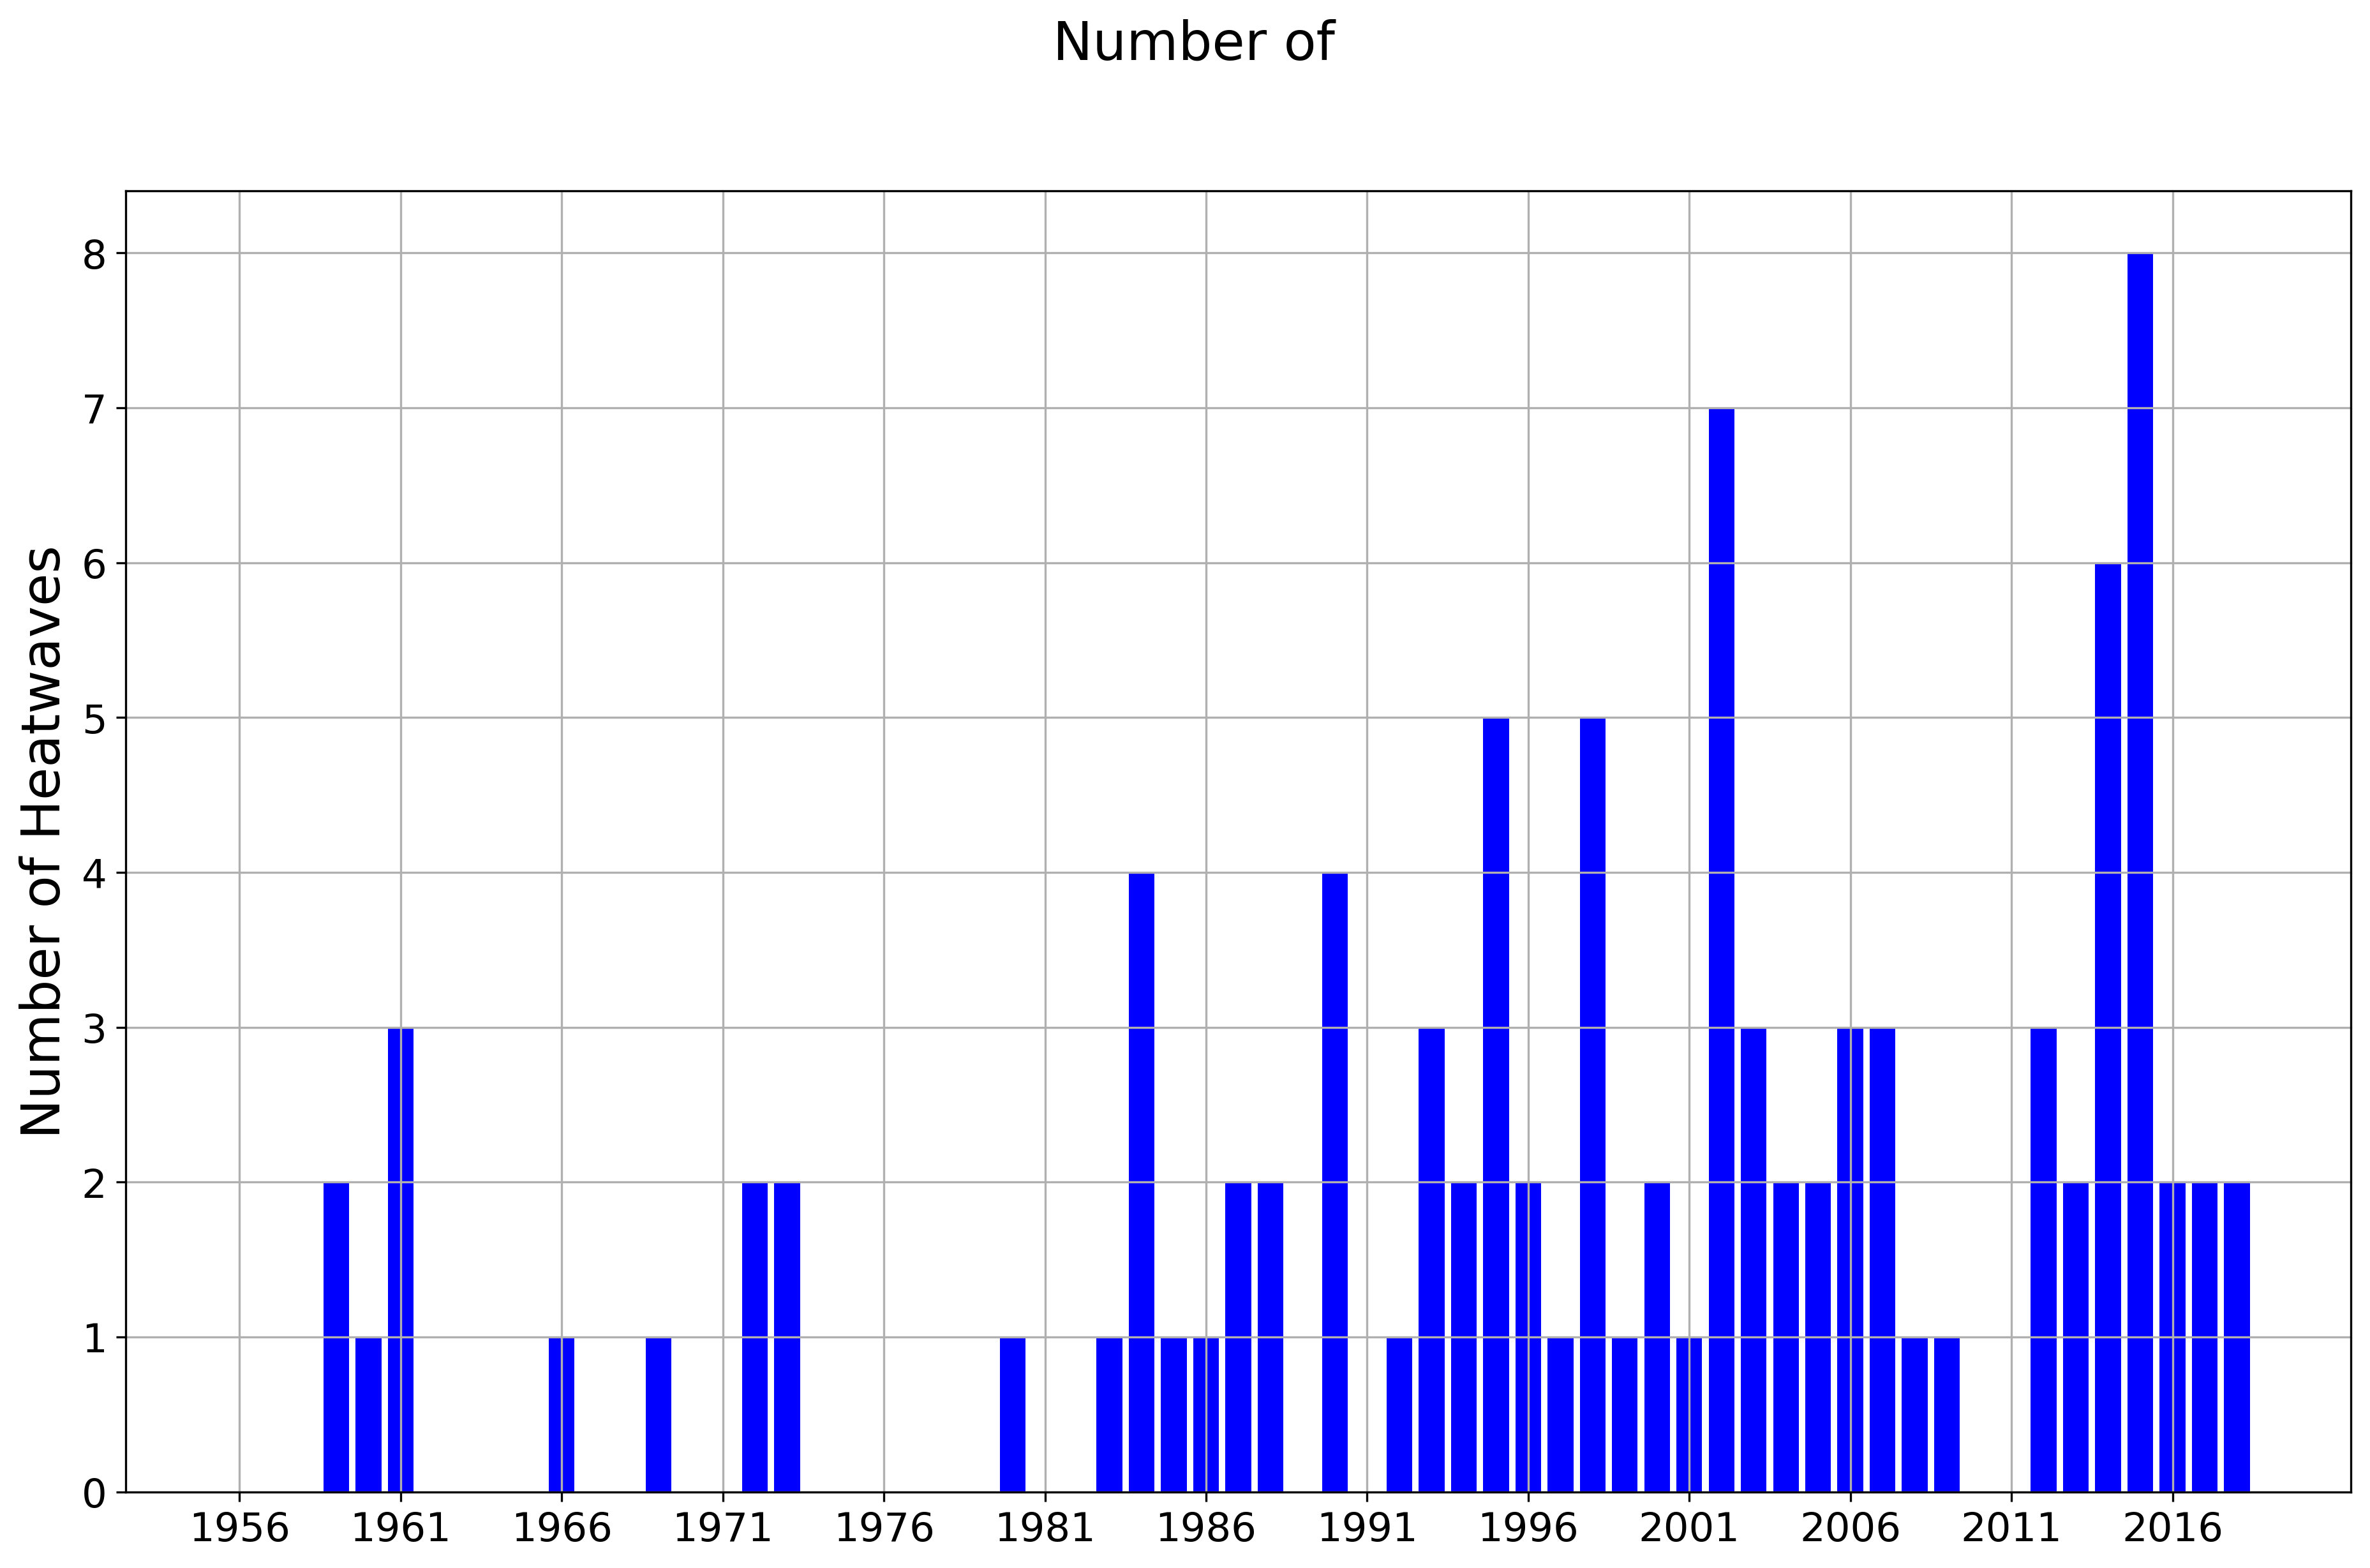

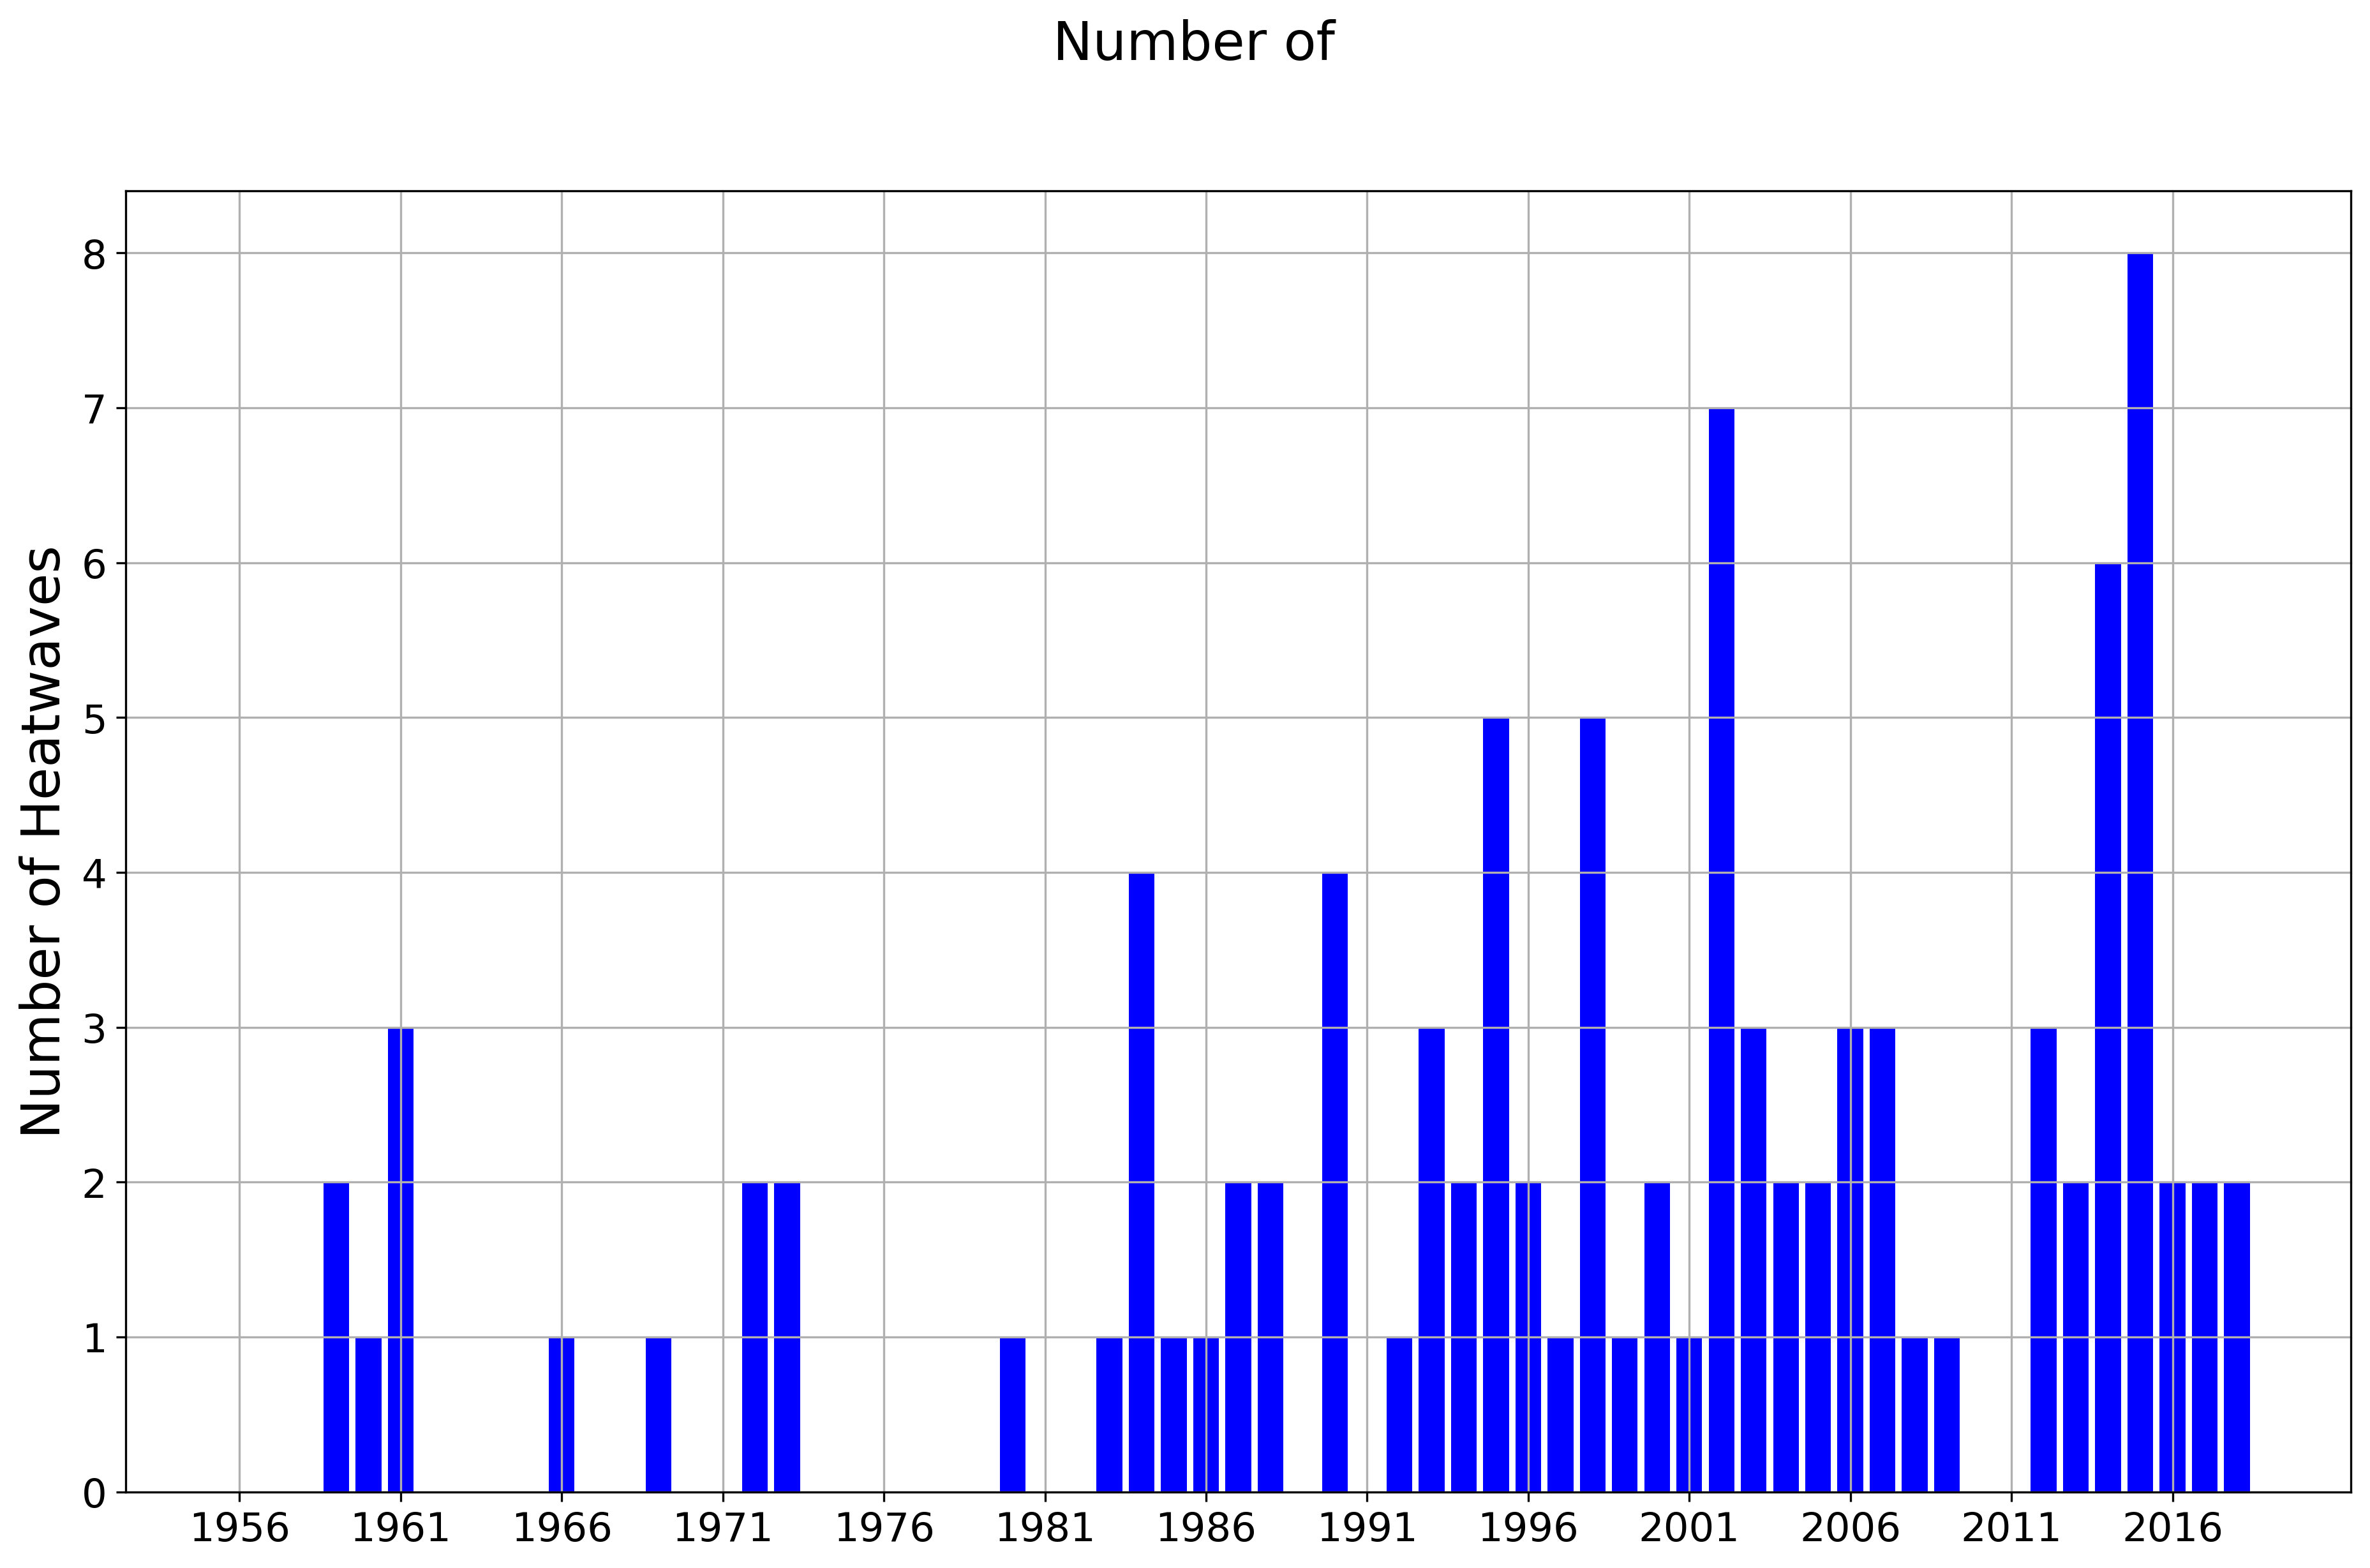

In [ ]:
tex.plot_oneMetric(HW_IAC_metrics,'HWN','Number of ')

##### HWD

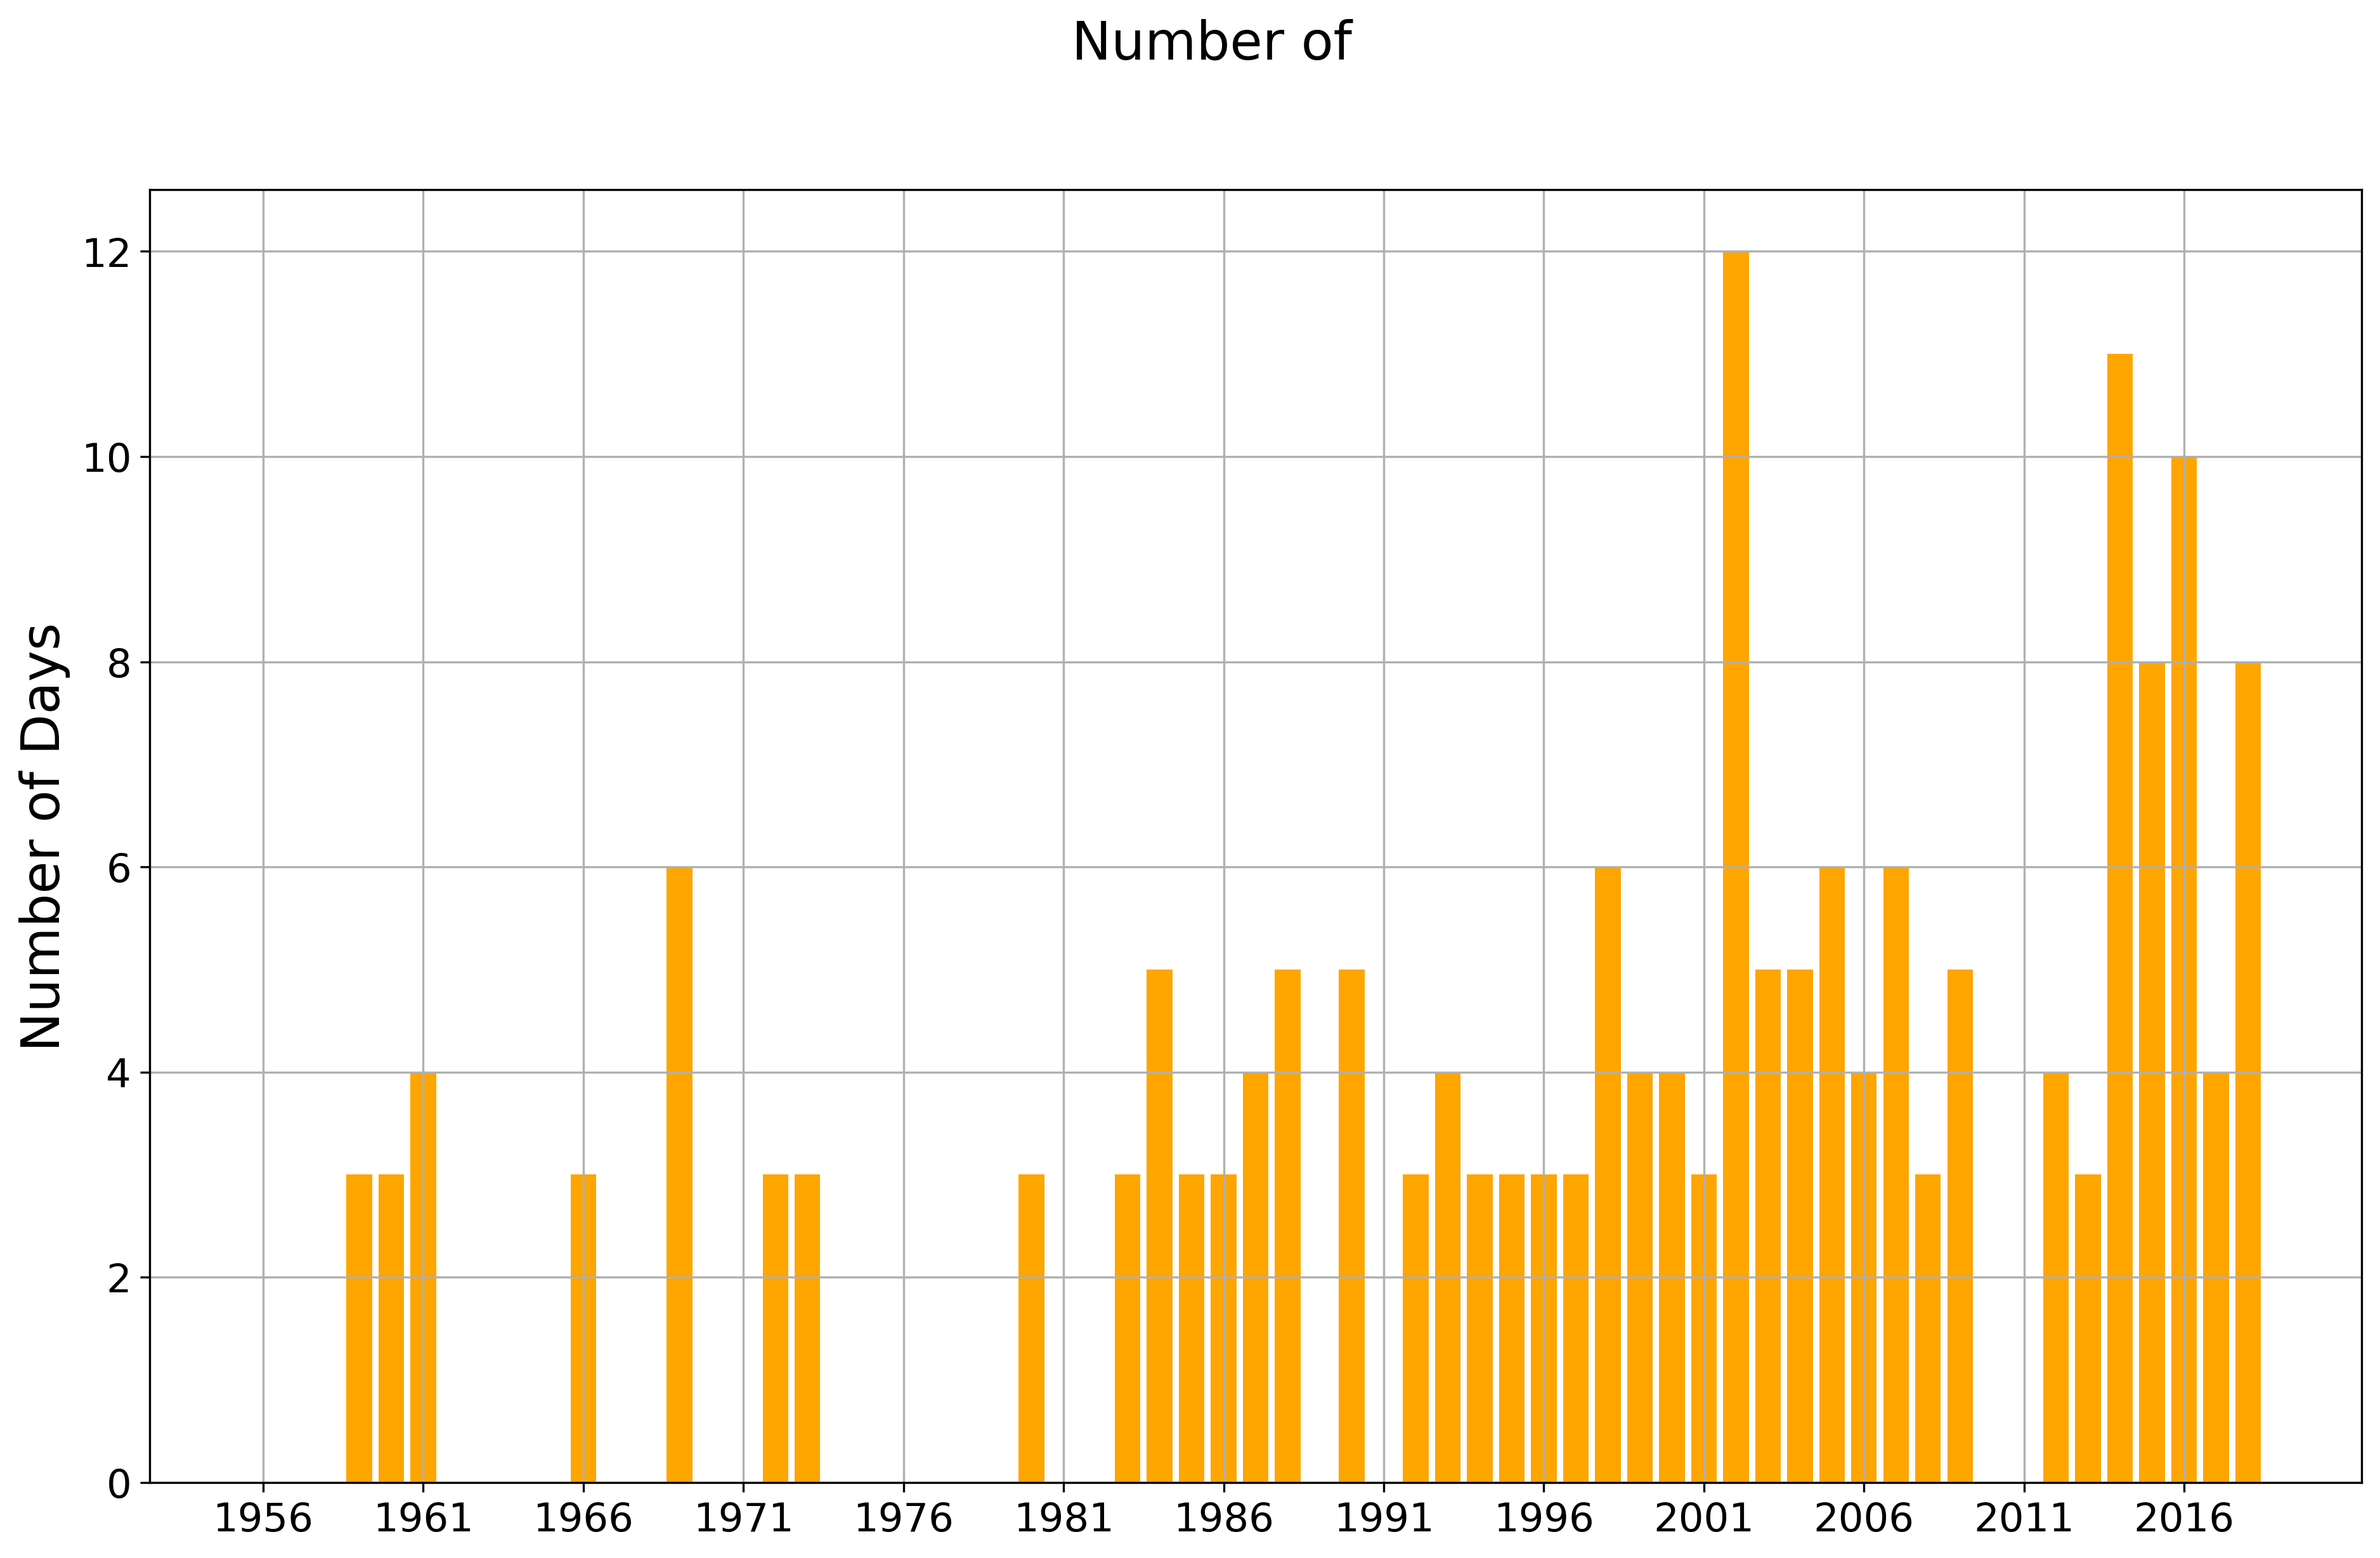

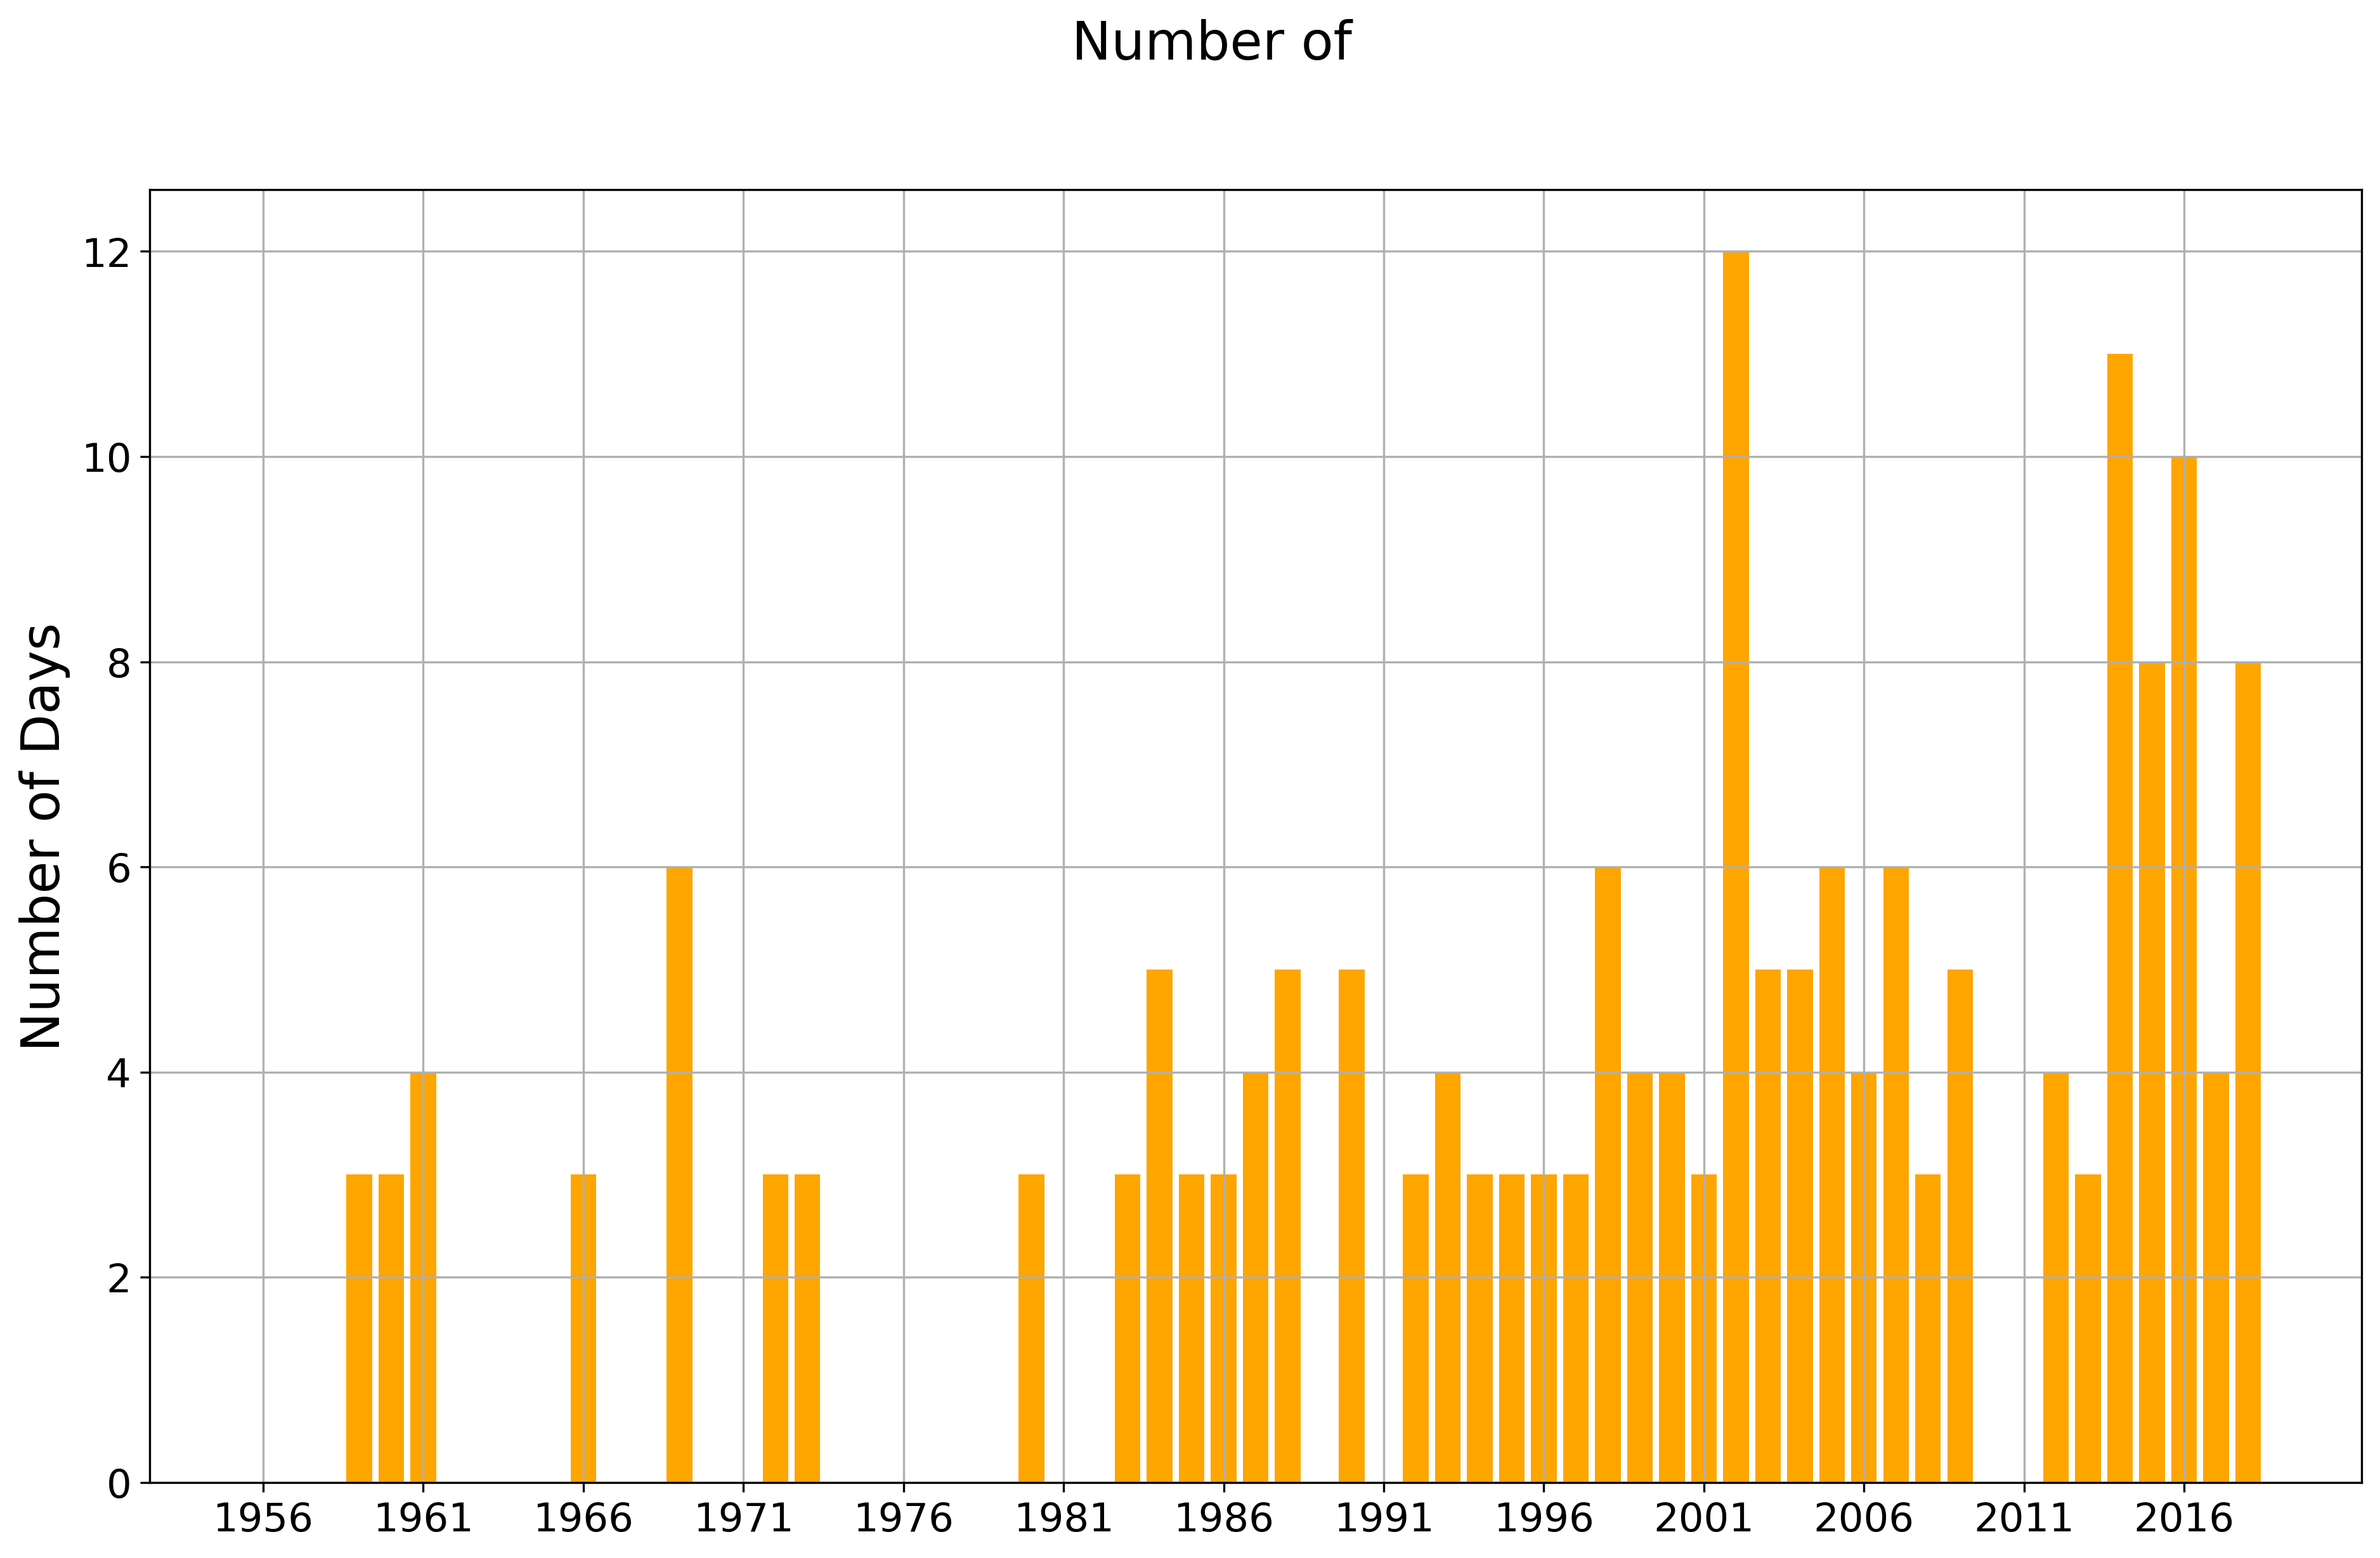

In [ ]:
tex.plot_oneMetric(HW_IAC_metrics,'HWD','Number of ')

##### HWF

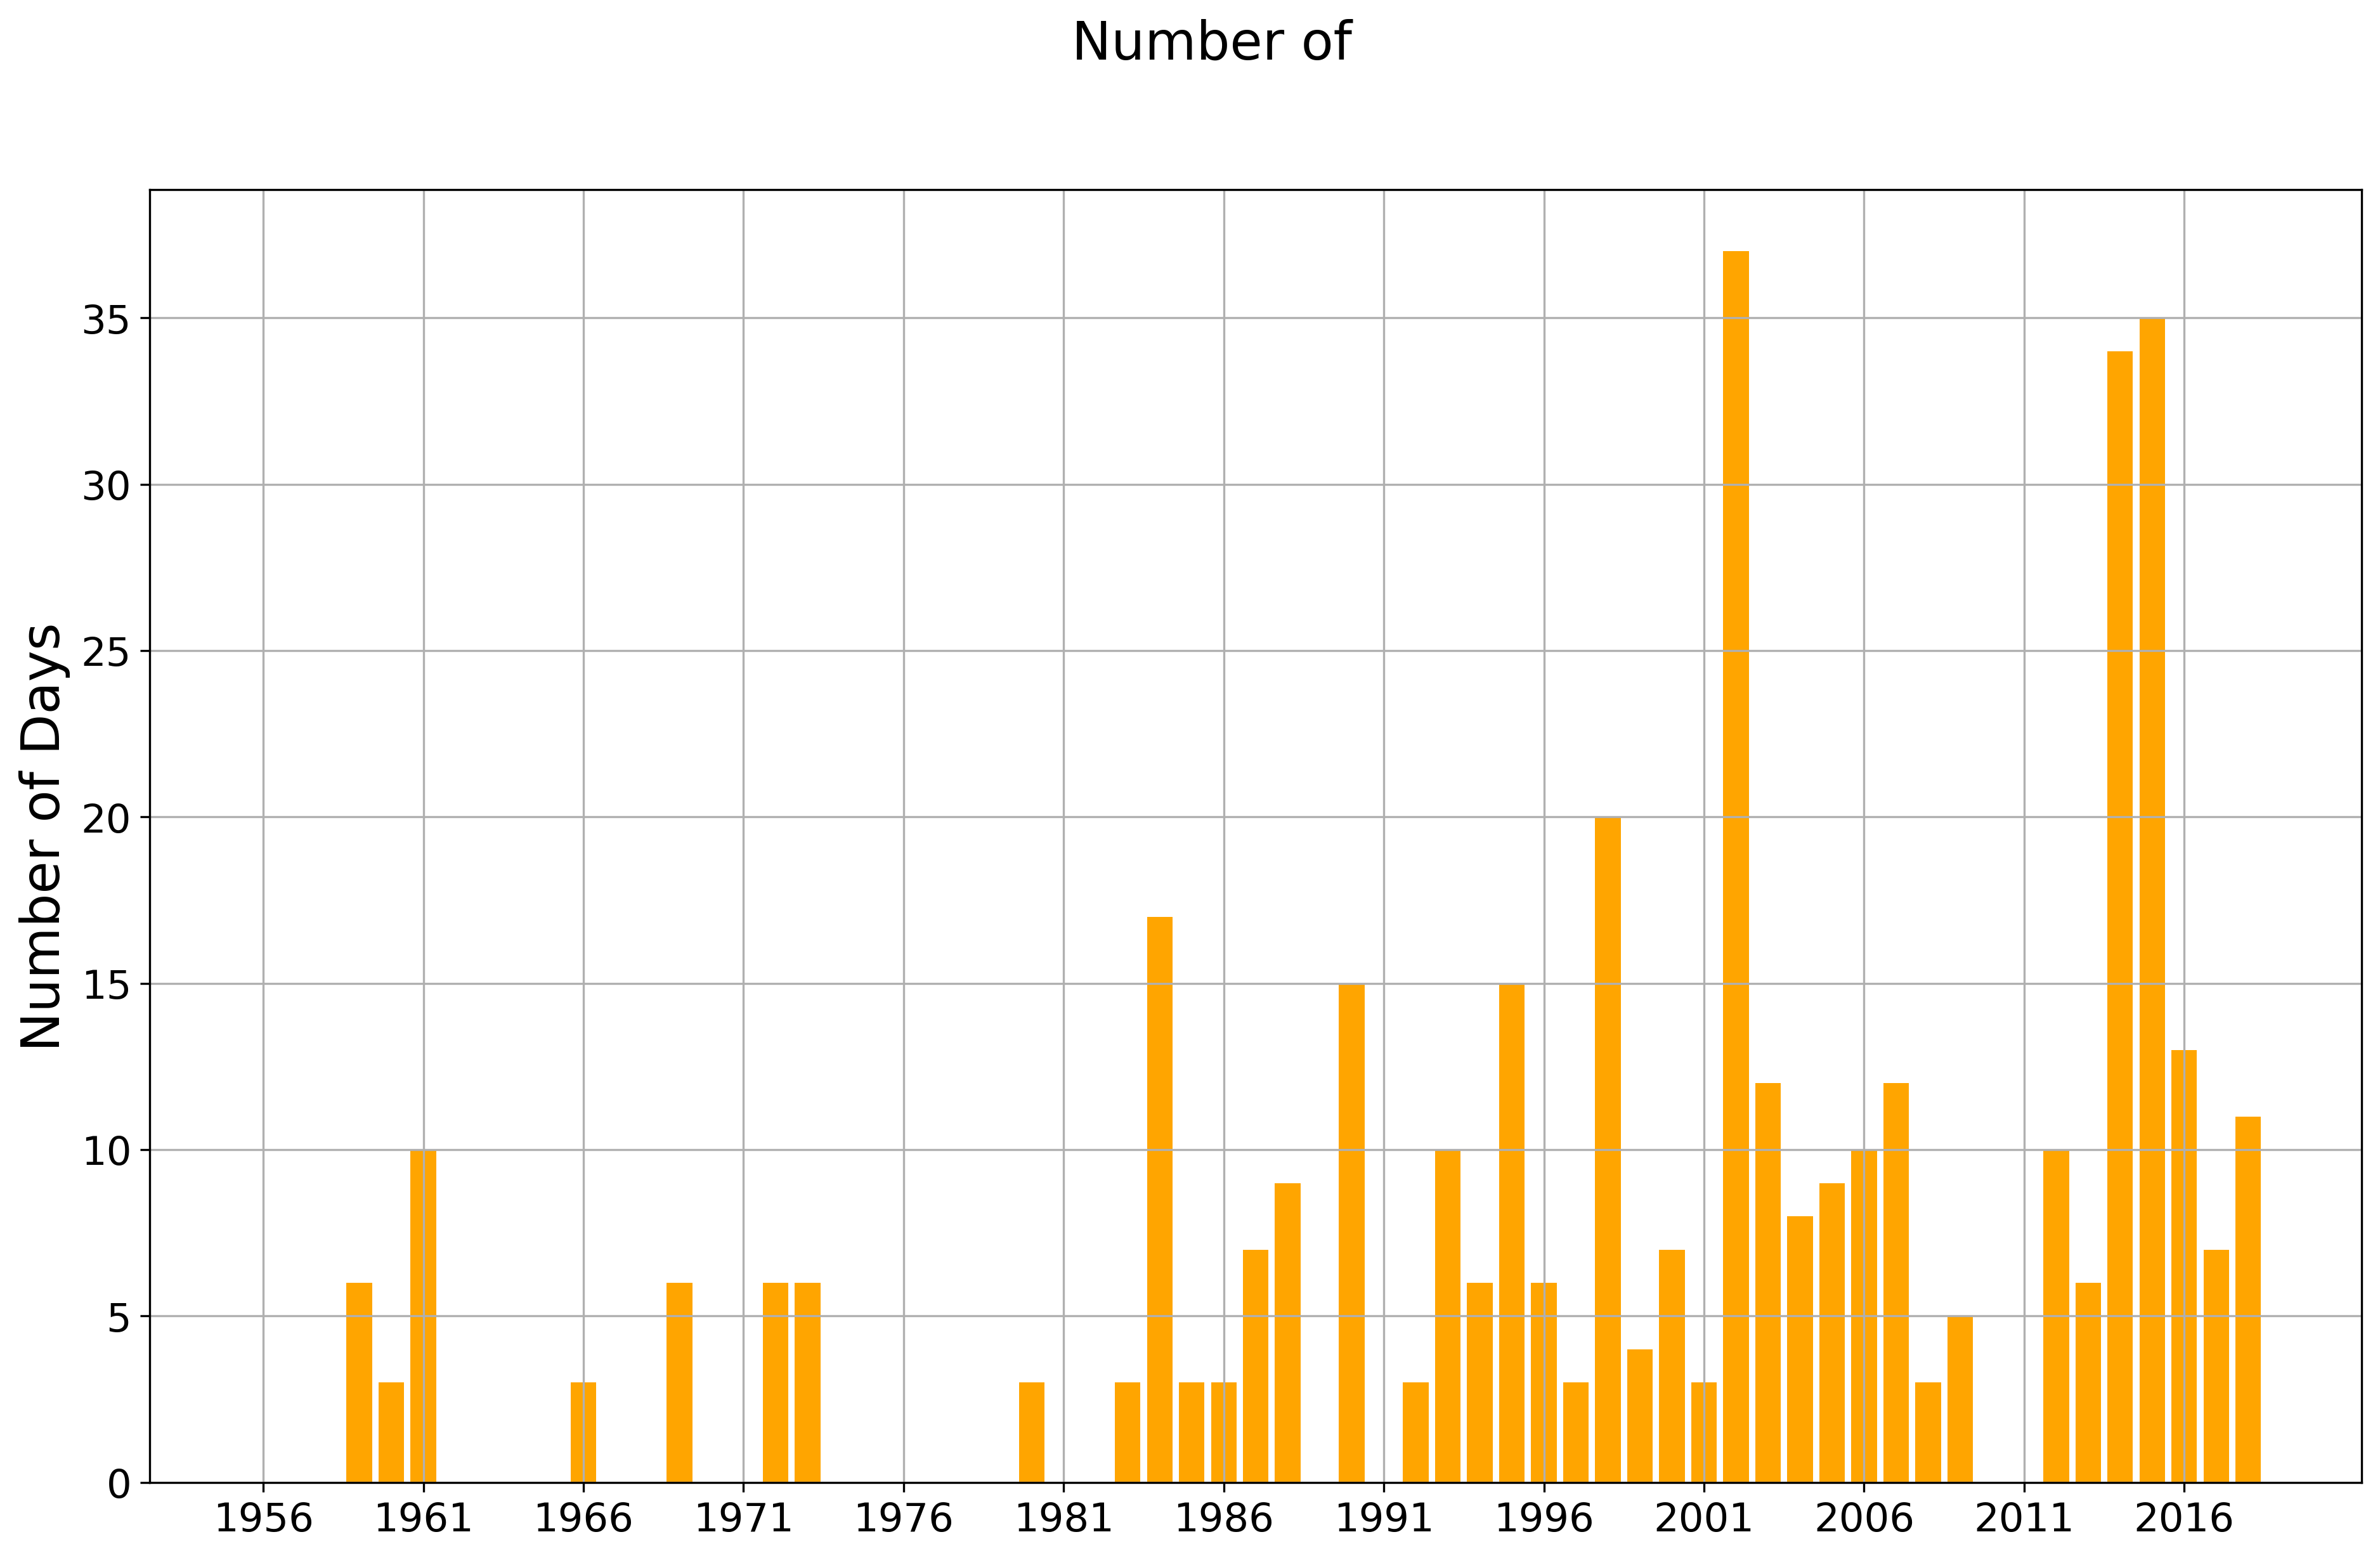

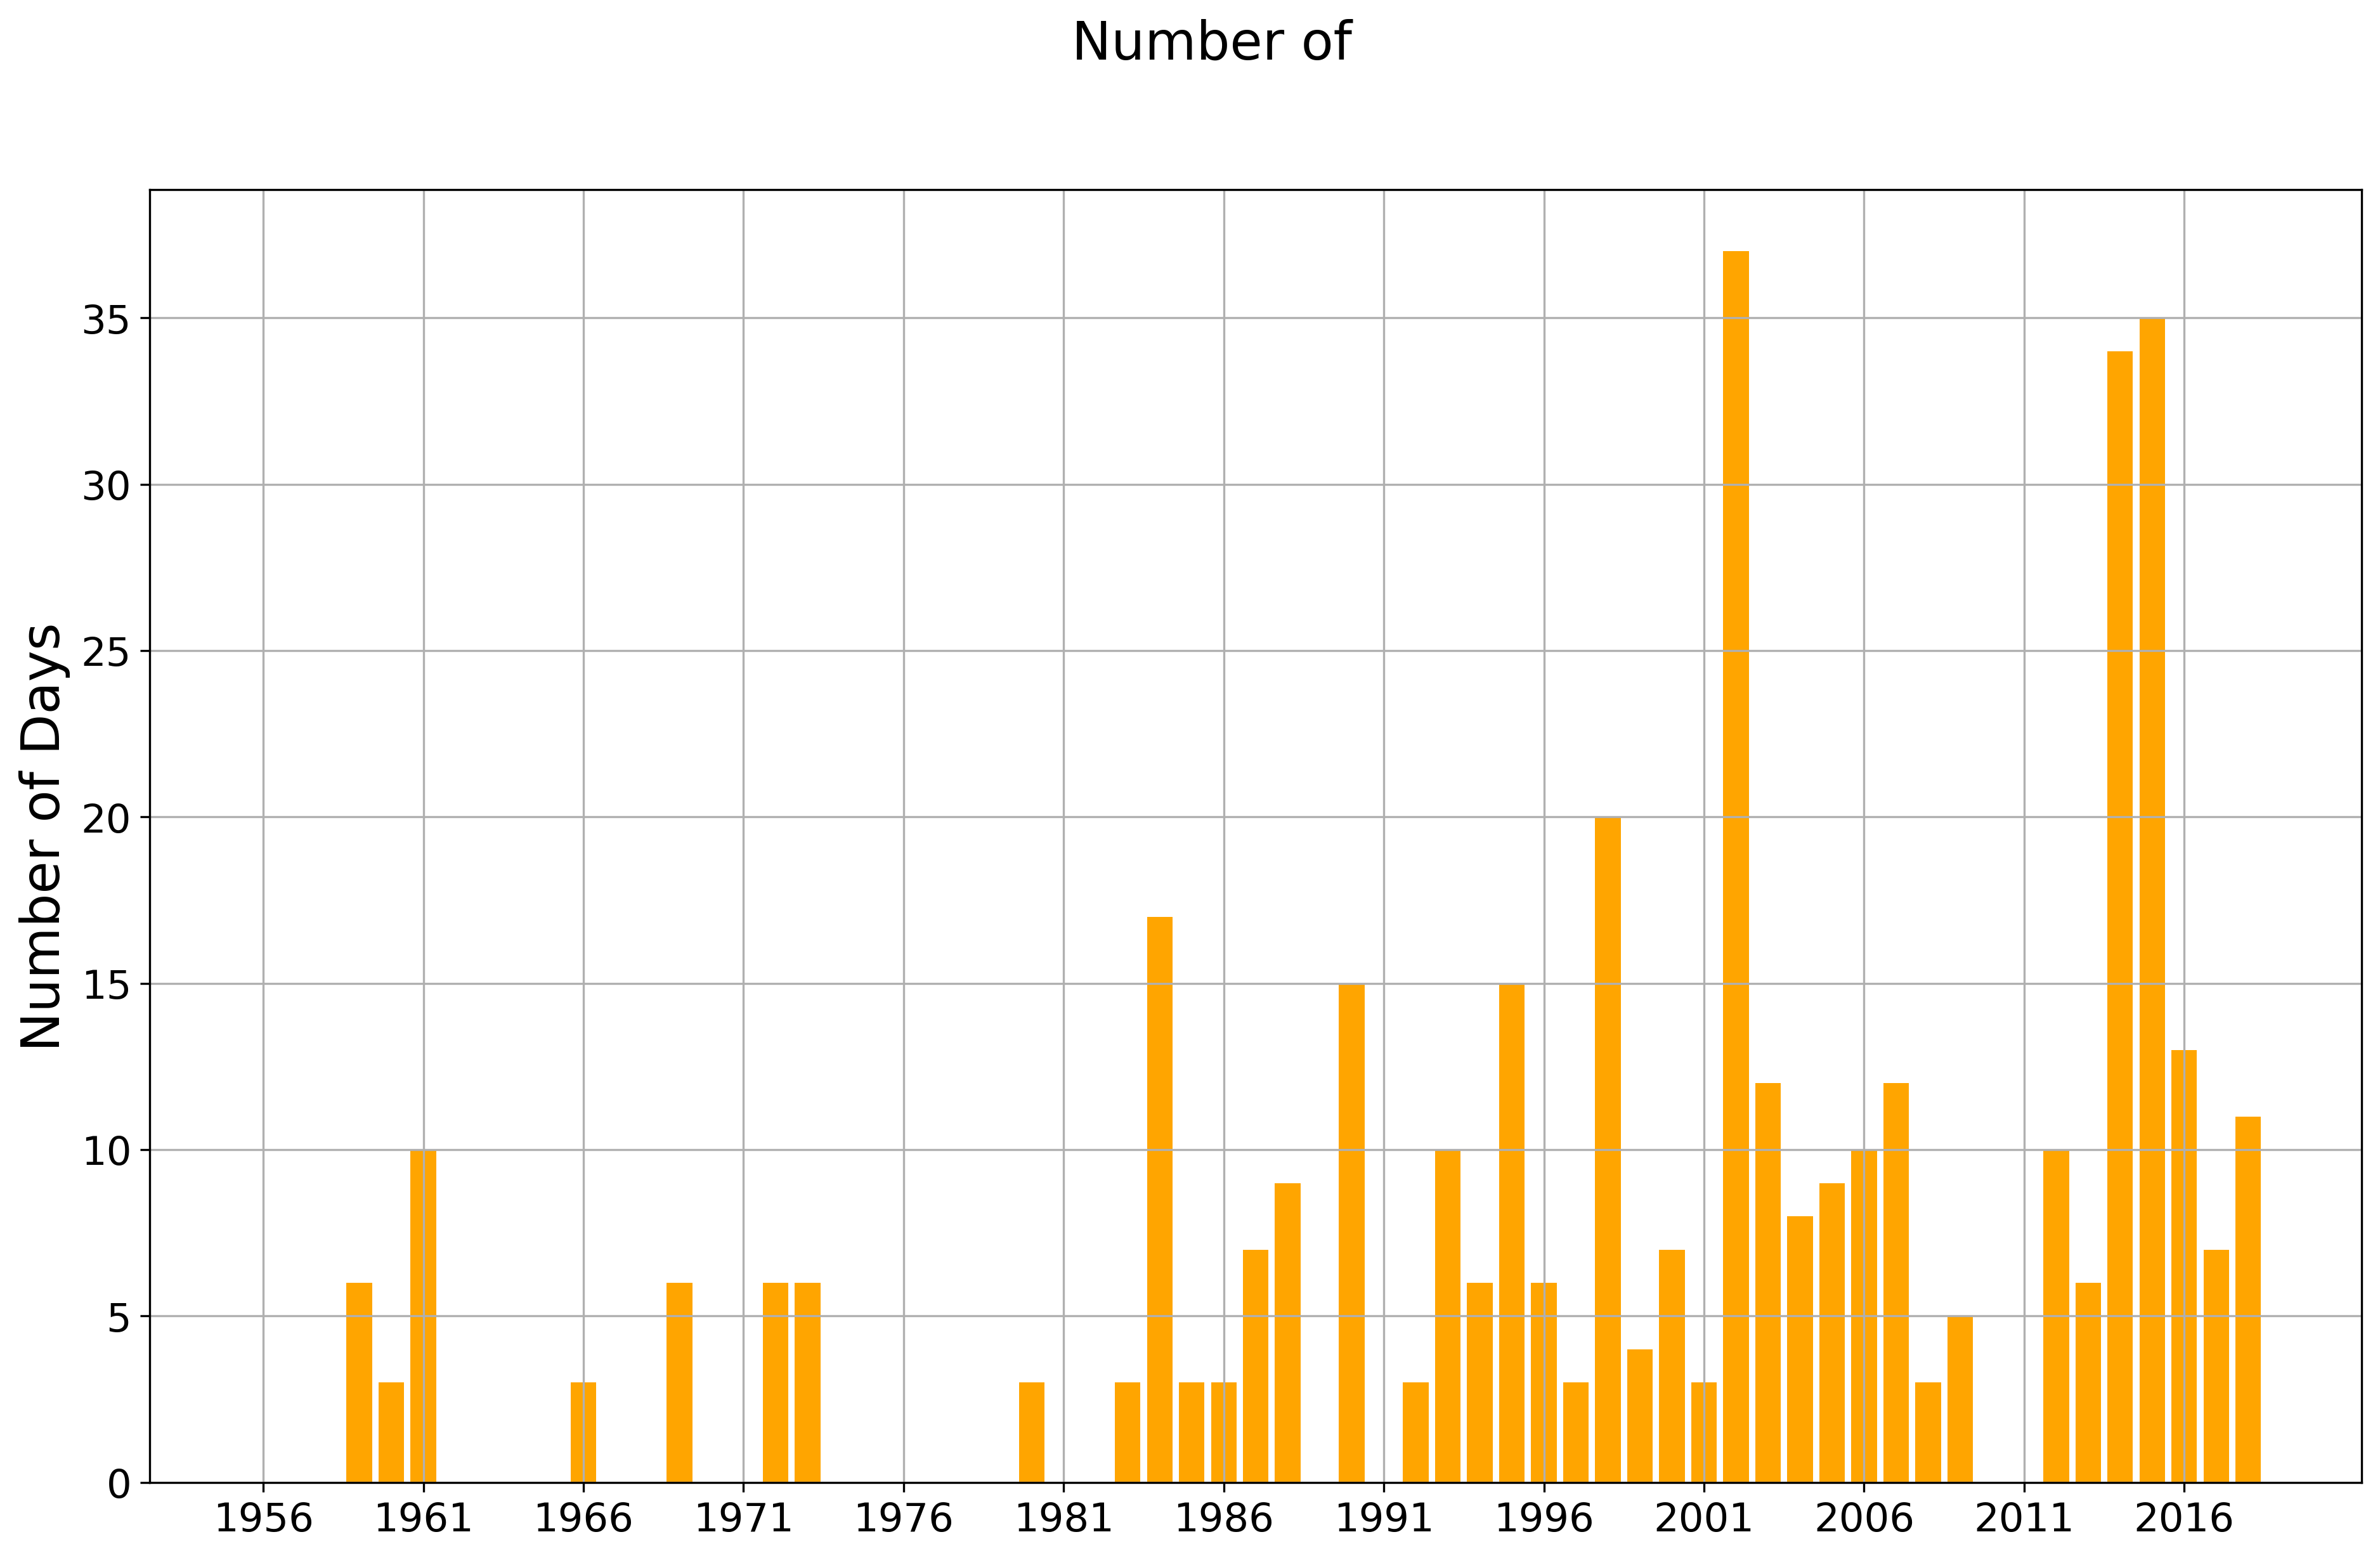

In [ ]:
tex.plot_oneMetric(HW_IAC_metrics,'HWF','Number of ')

#### Yearly metrics description

In [ ]:
#checking metrics value for whole database period
HW_IAC_metrics.sum()

HWN     98.0
HWD    186.0
HWF    389.0
dtype: float64

In [ ]:
HW_IAC_metrics.describe()

,HWN,HWD,HWF
count,63.000000,63.000000,63.000000
mean,1.555556,2.952381,6.174603
std,1.803024,2.892864,8.251177
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,3.000000,3.000000
75%,2.000000,4.000000,9.000000
max,8.000000,12.000000,37.000000


##### Metrics description according to 21 year sub-periods



###### 1956-1976

In [ ]:
#selecting period from 1956 to 1976
#checking metrics values
HW_IAC_metrics[(HW_IAC_metrics.index>=1956)&(HW_IAC_metrics.index<=1976)].sum()

HWN    12.0
HWD    25.0
HWF    40.0
dtype: float64

In [ ]:
#selecting period from 1956 to 1976
#checking descriptive statistics
HW_IAC_metrics[(HW_IAC_metrics.index>=1956)&(HW_IAC_metrics.index<=1976)].describe()

,HWN,HWD,HWF
count,21.000000,21.000000,21.000000
mean,0.571429,1.190476,1.904762
std,0.925820,1.833550,3.048028
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,3.000000,3.000000
max,3.000000,6.000000,10.000000


###### 1977-1997

In [ ]:
#selecting period from 1977 to 1997
#checking metrics values
HW_IAC_metrics[(HW_IAC_metrics.index>=1977)&(HW_IAC_metrics.index<=1997)].sum()

HWN     30.0
HWD     50.0
HWF    103.0
dtype: float64

In [ ]:
#selecting period from 1977 to 1997
#checking descriptive statistics
HW_IAC_metrics[(HW_IAC_metrics.index>=1977)&(HW_IAC_metrics.index<=1997)].describe()

,HWN,HWD,HWF
count,21.000000,21.000000,21.000000
mean,1.428571,2.380952,4.904762
std,1.502379,1.856777,5.430513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,3.000000,3.000000
75%,2.000000,3.000000,7.000000
max,5.000000,5.000000,17.000000


###### 1998-2018

In [ ]:
#selecting period from 1998 to 2018
#checking metrics values
HW_IAC_metrics[(HW_IAC_metrics.index>=1998)&(HW_IAC_metrics.index<=2018)].sum()

HWN     56.0
HWD    111.0
HWF    246.0
dtype: float64

In [ ]:
#selecting period from 1998 to 2018
#checking descriptive statistics
HW_IAC_metrics[(HW_IAC_metrics.index>=1998)&(HW_IAC_metrics.index<=2018)].describe()

,HWN,HWD,HWF
count,21.000000,21.000000,21.000000
mean,2.666667,5.285714,11.714286
std,2.152518,3.132776,10.918529
min,0.000000,0.000000,0.000000
25%,1.000000,4.000000,5.000000
50%,2.000000,5.000000,9.000000
75%,3.000000,6.000000,12.000000
max,8.000000,12.000000,37.000000


### Seasonal Metrics

Function: tex.wave_seasonMetrics


In [ ]:
#checking wave_seasonMetrics parameters
help(tex.wave_seasonMetrics)

Help on function wave_seasonMetrics in module climatex:

wave_seasonMetrics(df_checkW, wave_column, plot=False)
    #--------------------------------------------------------------------------------
    ## Function to obtain the metrics of a Heat/Cold Wave given the database
    ## dataframe containing the 'HW'/'CW' column that indicates if a day is inside
    ## of a Heat/Cold Wave or not -> check get_wave function. This function obtains
    ## the wave duration for each year (HWN) of the database and then computes its
    ## maximum duration (HWD) and its intensity - sum of wave durations (HWF). These
    ## metrics are stored in a dataframe which includes the Heat/Cold Wave metrics
    ## for each year of the database
    ##
    ## Also possible to plot the metrics, for a better adjustment of the plots, go
    ## to function plot_oneMetric
    ##
    ## :param      df_checkW:    The df check w
    ## :type       df_checkW:    { type_description }
    ## :param      wave_column:  The 

In [ ]:
#obtaining seasonal metrics
HW_IAC_seasonMetrics = tex.wave_seasonMetrics(HW_IAC,'HW')

In [ ]:
HW_IAC_seasonMetrics

HWN  HWD  HWF
YEAR SEASON               
1956 1       0.0  0.0  0.0
     2       0.0  0.0  0.0
     3       0.0  0.0  0.0
     4       0.0  0.0  0.0
1957 1       0.0  0.0  0.0
...          ...  ...  ...
2017 4       1.0  4.0  4.0
2018 1       0.0  0.0  0.0
     2       0.0  0.0  0.0
     3       0.0  0.0  0.0
     4       1.0  3.0  3.0

[252 rows x 3 columns]

#### Plotting metrics

Function: tex.plot_seasonMetric



##### HWN

In [ ]:
tex.plot_seasonMetric(HW_IAC_seasonMetrics,'HWN','Number of ')

AttributeError: ignored

##### HWD

In [ ]:
tex.plot_seasonMetric(HW_IAC_seasonMetrics,'HWD','Number of ')

##### HWF

In [ ]:
tex.plot_seasonMetric(HW_IAC_seasonMetrics,'HWD','Number of ')

#### Seasonal metrics description

In [ ]:
#checking metrics value for whole database period
HW_IAC_seasonMetrics.sum()

##### Summer



In [ ]:
#checking metrics values for summer
HW_IAC_seasonMetrics.xs('1', level=1).sum()

###### Metrics description according to 21 year sub-periods

###### 1956-1976

In [ ]:
HW_IAC_seasonMetrics.xs('1', level=1)[((HW_IAC_seasonMetrics.xs('1', level=1).index>=1956)&(HW_IAC_seasonMetrics.xs('1', level=1).index<=1976))].sum()

###### 1977-1997

In [ ]:
HW_IAC_seasonMetrics.xs('1', level=1)[((HW_IAC_seasonMetrics.xs('1', level=1).index>=1977)&(HW_IAC_seasonMetrics.xs('1', level=1).index<=1997))].sum()

###### 1998-2018

In [ ]:
HW_IAC_seasonMetrics.xs('1', level=1)[((HW_IAC_seasonMetrics.xs('1', level=1).index>=1998)&(HW_IAC_seasonMetrics.xs('1', level=1).index<=2018))].sum()

##### Autumn



In [ ]:
#checking metrics values for autumn
HW_IAC_seasonMetrics.xs('2', level=1).sum()

###### Metrics description according to 21 year sub-periods

###### 1956-1976

In [ ]:
HW_IAC_seasonMetrics.xs('2', level=1)[((HW_IAC_seasonMetrics.xs('2', level=1).index>=1956)&(HW_IAC_seasonMetrics.xs('2', level=1).index<=1976))].sum()

###### 1977-1997

In [ ]:
HW_IAC_seasonMetrics.xs('2', level=1)[((HW_IAC_seasonMetrics.xs('2', level=1).index>=1977)&(HW_IAC_seasonMetrics.xs('2', level=1).index<=1997))].sum()

###### 1998-2018

In [ ]:
HW_IAC_seasonMetrics.xs('2', level=1)[((HW_IAC_seasonMetrics.xs('2', level=1).index>=1998)&(HW_IAC_seasonMetrics.xs('2', level=1).index<=2018))].sum()

##### Winter



In [ ]:
#checking metrics values for winter
HW_IAC_seasonMetrics.xs('3', level=1).sum()

###### Metrics description according to 21 year sub-periods

###### 1956-1976



In [ ]:
HW_IAC_seasonMetrics.xs('3', level=1)[((HW_IAC_seasonMetrics.xs('3', level=1).index>=1956)&(HW_IAC_seasonMetrics.xs('3', level=1).index<=1976))].sum()

###### 1977-1997

In [ ]:
HW_IAC_seasonMetrics.xs('3', level=1)[((HW_IAC_seasonMetrics.xs('3', level=1).index>=1977)&(HW_IAC_seasonMetrics.xs('3', level=1).index<=1997))].sum()

###### 1998-2018

In [ ]:
HW_IAC_seasonMetrics.xs('3', level=1)[((HW_IAC_seasonMetrics.xs('3', level=1).index>=1998)&(HW_IAC_seasonMetrics.xs('3', level=1).index<=2018))].sum()

##### Spring



In [ ]:
#checking metrics values for spring
HW_IAC_seasonMetrics.xs('4', level=1).sum()

###### Metrics description according to 21 year sub-periods

###### 1956-1976

In [ ]:
HW_IAC_seasonMetrics.xs('4', level=1)[((HW_IAC_seasonMetrics.xs('4', level=1).index>=1956)&(HW_IAC_seasonMetrics.xs('4', level=1).index<=1976))].sum()

###### 1977-1997

In [ ]:
HW_IAC_seasonMetrics.xs('4', level=1)[((HW_IAC_seasonMetrics.xs('4', level=1).index>=1977)&(HW_IAC_seasonMetrics.xs('4', level=1).index<=1997))].sum()

###### 1998-2018

In [ ]:
HW_IAC_seasonMetrics.xs('4', level=1)[((HW_IAC_seasonMetrics.xs('4', level=1).index>=1998)&(HW_IAC_seasonMetrics.xs('4', level=1).index<=2018))].sum()

## Trend Analysis: Yearly Metrics

### Autocorrrelation


In [ ]:
plot_acf(HW_IAC_metrics['HWN'], lags=20)
plt.show()

In [ ]:
plot_acf(HW_IAC_metrics['HWD'], lags=20)
plt.show()

In [ ]:
plot_acf(HW_IAC_metrics['HWF'], lags=20)
plt.show()

In [ ]:
acf(HW_IAC_metrics['HWN'],unbiased=True)

In [ ]:
acf(HW_IAC_metrics['HWD'],unbiased=True)

In [ ]:
acf(HW_IAC_metrics['HWF'],unbiased=True)

### Mann-Kendall



#### HWN


In [ ]:
result_HWN = mk.original_test(HW_IAC_metrics['HWN'])
print(result_HWN)

In [ ]:
result_HWN1= mk.trend_free_pre_whitening_modification_test(HW_IAC_metrics['HWN'])
print(result_HWN1)

#### HWD


In [ ]:
result_HWD = mk.original_test(HW_IAC_metrics['HWD'])
print(result_HWD)

In [ ]:
result_HWD1= mk.trend_free_pre_whitening_modification_test(HW_IAC_metrics['HWD'])
print(result_HWD1)

#### HWF


In [ ]:
result_HWF = mk.original_test(HW_IAC_metrics['HWF'])
print(result_HWF)

In [ ]:
result_HWF1= mk.trend_free_pre_whitening_modification_test(HW_IAC_metrics['HWF'])
print(result_HWF1)

### Pettitt Test

In [ ]:
result = hg.pettitt_test(HW_IAC_metrics['HWN'])
print(result)


In [ ]:
result1 = hg.pettitt_test(HW_IAC_metrics['HWD'])
print(result1)

In [ ]:
result2 = hg.pettitt_test(HW_IAC_metrics['HWF'])
print(result2)

## Trend Analysis: Seasonal Metrics

### Mann-Kendall


#### Summer



##### HWN

In [ ]:
result1 = mk.original_test(HW_IAC_seasonMetrics['HWN'].xs('1', level=1))
print(result1)

##### HWD

In [ ]:
result2 = mk.original_test(HW_IAC_seasonMetrics['HWD'].xs('1', level=1))
print(result2)


##### HWF

In [ ]:
result3 = mk.original_test(HW_IAC_seasonMetrics['HWF'].xs('1', level=1))
print(result3)


#### Autumn



##### HWN

In [ ]:
result1 = mk.original_test(HW_IAC_seasonMetrics['HWN'].xs('2', level=1))
print(result1)

##### HWD

In [ ]:
result2 = mk.original_test(HW_IAC_seasonMetrics['HWD'].xs('2', level=1))
print(result2)

##### HWF

In [ ]:
result3 = mk.original_test(HW_IAC_seasonMetrics['HWF'].xs('2', level=1))
print(result3)

#### Winter



##### HWN

In [ ]:
result1 = mk.original_test(HW_IAC_seasonMetrics['HWN'].xs('3', level=1))
print(result1)

##### HWD

In [ ]:
result2 = mk.original_test(HW_IAC_seasonMetrics['HWD'].xs('3', level=1))
print(result2)

##### HWF

In [ ]:
result3 = mk.original_test(HW_IAC_seasonMetrics['HWF'].xs('3', level=1))
print(result3)

#### Spring



##### HWN

In [ ]:
result1 = mk.original_test(HW_IAC_seasonMetrics['HWN'].xs('4', level=1))
print(result1)

##### HWD

In [ ]:
result2 = mk.original_test(HW_IAC_seasonMetrics['HWD'].xs('4', level=1))
print(result2)

##### HWF

In [ ]:
result3 = mk.original_test(HW_IAC_seasonMetrics['HWF'].xs('4', level=1))
print(result3)

## Heatwave Intensity



In [ ]:
#creating a list with the indices of maximum temperatures of each heatwave
idx_list=[]
len_list=[]
wave_idx = np.flatnonzero(HW_IAC['HW'])
for group in mit.consecutive_groups(wave_idx):
    hw=list(group)
    len_list.append(len(hw))
    idx = HW_IAC.loc[hw[0]:hw[-1],'N_AIRTMP_MAX'].idxmax()#Tmax of each HW
    idx_list.append(idx)

In [ ]:
len(idx_list)

In [ ]:
df = HW_IAC[['DAY365','DATE','N_AIRTMP_MAX']].iloc[idx_list]
df = df.reset_index(drop=True)
df_pct_tmax = pd.merge(df,pct_IAC,on='DAY365')

In [ ]:
df_pct_tmax

In [ ]:
del df_pct_tmax['CTN90pct']
df_pct_tmax['Tmax_anomaly']=df_pct_tmax['N_AIRTMP_MAX']-df_pct_tmax['CTX90pct']

In [ ]:
df_pct_tmax

In [ ]:
seasons = ['1', '1', '2', '2', '2', '3', '3', '3', '4', '4', '4', '1']
month_to_season = dict(zip(range(1,13), seasons))

df_pct_tmax['season']=df_pct_tmax.DATE.dt.month.map(month_to_season) 

In [ ]:
df_pct_tmax.loc[df_pct_tmax.DATE.dt.month==12]

In [ ]:
df_pct_tmax.loc[df_pct_tmax.DATE.dt.month==12,'DATE'] += pd.offsets.DateOffset(years=1)

In [ ]:
df_pct_tmax.loc[df_pct_tmax.DATE.dt.month==12] 

In [ ]:
df_pct_tmax = df_pct_tmax[df_pct_tmax.DATE.dt.year < 2019]
df_pct_tmax

### Summer



In [ ]:
df_summer = df_pct_tmax[df_pct_tmax['season']=='1']
df_summer

#### Dividing temperatures according to 21 year sub-periods


##### 1956-1976

In [ ]:
df_summer[(df_summer.DATE.dt.year >= 1956) & (df_summer.DATE.dt.year <= 1976)]

##### 1977-1997

In [ ]:
df_summer[(df_summer.DATE.dt.year >= 1977) & (df_summer.DATE.dt.year <= 1997)]

##### 1998-2018

In [ ]:
df_summer[(df_summer.DATE.dt.year >= 1998) & (df_summer.DATE.dt.year <= 2018) & (df_summer['Tmax_anomaly'] <=2)]

In [ ]:
df_summer[(df_summer.DATE.dt.year >= 1998) & (df_summer.DATE.dt.year <= 2018) & (df_summer['Tmax_anomaly'] >2) & ((df_summer['Tmax_anomaly'] <=4))]

In [ ]:
df_summer[(df_summer.DATE.dt.year >= 1998) & (df_summer.DATE.dt.year <= 2018) & (df_summer['Tmax_anomaly'] > 4)]

### Autumn



In [ ]:
df_autumn = df_pct_tmax[df_pct_tmax['season']=='2']
df_autumn

#### Dividing temperatures according to 21 year sub-periods


##### 1956-1976

In [ ]:
df_autumn[(df_autumn.DATE.dt.year >= 1956) & (df_autumn.DATE.dt.year <= 1976)]

##### 1977-1997

In [ ]:
df_autumn[(df_autumn.DATE.dt.year >= 1977) & (df_autumn.DATE.dt.year <= 1997)]

##### 1998-2018

In [ ]:
df_autumn[(df_autumn.DATE.dt.year >= 1998) & (df_autumn.DATE.dt.year <= 2018) & (df_autumn['Tmax_anomaly'] <=2)]

In [ ]:
df_autumn[(df_autumn.DATE.dt.year >= 1998) & (df_autumn.DATE.dt.year <= 2018) & (df_autumn['Tmax_anomaly'] >2) & ((df_autumn['Tmax_anomaly'] <=4))]

In [ ]:
df_autumn[(df_autumn.DATE.dt.year >= 1998) & (df_autumn.DATE.dt.year <= 2018) & (df_autumn['Tmax_anomaly'] > 4)]

### Winter



In [ ]:
df_winter = df_pct_tmax[df_pct_tmax['season']=='3']
df_winter

#### Dividing temperatures according to 21 year sub-periods


##### 1956-1976

In [ ]:
df_winter[(df_winter.DATE.dt.year >= 1956) & (df_winter.DATE.dt.year <= 1976)]

##### 1977-1997

In [ ]:
df_winter[(df_winter.DATE.dt.year >= 1977) & (df_winter.DATE.dt.year <= 1997)]

##### 1998-2018

In [ ]:
df_winter[(df_winter.DATE.dt.year >= 1998) & (df_winter.DATE.dt.year <= 2018) & (df_winter['Tmax_anomaly'] <=2)]

In [ ]:
df_winter[(df_winter.DATE.dt.year >= 1998) & (df_winter.DATE.dt.year <= 2018) & (df_winter['Tmax_anomaly'] >2) & ((df_winter['Tmax_anomaly'] <=4))]

In [ ]:
df_winter[(df_winter.DATE.dt.year >= 1998) & (df_winter.DATE.dt.year <= 2018) & (df_winter['Tmax_anomaly'] > 4)]

### Spring



In [ ]:
df_spring = df_pct_tmax[df_pct_tmax['season']=='4']
df_spring

#### Dividing temperatures according to 21 year sub-periods


##### 1956-1976

In [ ]:
df_spring[(df_spring.DATE.dt.year >= 1956) & (df_spring.DATE.dt.year <= 1976)]

##### 1977-1997

In [ ]:
df_spring[(df_spring.DATE.dt.year >= 1977) & (df_spring.DATE.dt.year <= 1997)]

##### 1998-2018

In [ ]:
df_spring[(df_spring.DATE.dt.year >= 1998) & (df_spring.DATE.dt.year <= 2018) & (df_spring['Tmax_anomaly'] <=2)]

In [ ]:
df_spring[(df_spring.DATE.dt.year >= 1998) & (df_spring.DATE.dt.year <= 2018) & (df_spring['Tmax_anomaly'] >2) & ((df_spring['Tmax_anomaly'] <=4))]

In [ ]:
df_spring[(df_spring.DATE.dt.year >= 1998) & (df_spring.DATE.dt.year <= 2018) & (df_spring['Tmax_anomaly'] > 4)]